In [ ]:
import pandas as pd
#https://files.data.gouv.fr/geo-dvf/latest/csv/2025/
df = pd.read_csv("dataset/valeurs-foncieres-2005.csv", low_memory=False)#, on_bad_lines='skip')
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2025-1,2025-01-07,1,Vente,468000.0,NaN,NaN,FARGES,B078,1550.0,...,NaN,NaN,NaN,J,jardins,NaN,NaN,78.0,5.907229,46.170923
1,2025-1,2025-01-07,1,Vente,468000.0,454.0,NaN,RUE DE LA REPUBLIQUE,0090,1550.0,...,Maison,111.0,5.0,S,sols,NaN,NaN,133.0,5.907186,46.170782
2,2025-1,2025-01-07,1,Vente,468000.0,454.0,NaN,RUE DE LA REPUBLIQUE,0090,1550.0,...,Dépendance,NaN,0.0,S,sols,NaN,NaN,133.0,5.907186,46.170782
3,2025-2,2025-01-06,1,Vente,180000.0,NaN,NaN,LE VILLAGE,B158,1200.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,46.0,5.801623,46.164573
4,2025-2,2025-01-06,1,Vente,180000.0,NaN,NaN,LE VILLAGE,B158,1200.0,...,NaN,NaN,NaN,J,jardins,NaN,NaN,17.0,5.801676,46.164610


In [ ]:

#usual commands to start looking at the dataset 
#print(df["type_local"].value_counts(dropna=False))
#df[df['latitude'].isna()].index
#df.info()
#nan_rate = df.isna().mean() * 100
#print(nan_rate)
#print(df.isna().sum())

In [3]:
#type_local seems a key information (appartment vs maison), yet data.gouv.fr provides a low quality dataset
counts = df['type_local'].value_counts(dropna=False)
percent_dist = df['type_local'].value_counts(normalize=True, dropna=False) * 100
type_local_stats = pd.DataFrame({
    'count': counts,
    'percent': percent_dist
})
print(type_local_stats)

                                           count    percent
type_local                                                 
NaN                                       572338  41.262165
Dépendance                                365791  26.371355
Maison                                    218924  15.783118
Appartement                               185939  13.405096
Local industriel. commercial ou assimilé   44085   3.178266


In [4]:
#drop the columns not used, list from df.columns.to_list()
exclusions = [
    #'id_mutation',
    #'date_mutation',
    'numero_disposition',
    #'nature_mutation',
    #'valeur_fonciere',
    'adresse_numero',
    'adresse_suffixe',
    'adresse_nom_voie',
    'adresse_code_voie',
    #'code_postal',
    #'code_commune',
    #'nom_commune',
    'code_departement',
    'ancien_code_commune',
    'ancien_nom_commune',
    'id_parcelle',
    'ancien_id_parcelle',
    'numero_volume',
    'lot1_numero',
    'lot1_surface_carrez',
    'lot2_numero',
    'lot2_surface_carrez',
    'lot3_numero',
    'lot3_surface_carrez',
    'lot4_numero',
    'lot4_surface_carrez',
    'lot5_numero',
    'lot5_surface_carrez',
    #'nombre_lots',
    #'code_type_local',
    #'type_local',
    #'surface_reelle_bati',
    #'nombre_pieces_principales',
    'code_nature_culture',
    'nature_culture',
    'code_nature_culture_speciale',
    'nature_culture_speciale',
    #'surface_terrain',
    #'longitude',
    #'latitude'
 ]
df = df.drop(columns=exclusions)
df.head()
#remove the lines having NaN

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2025-1,2025-01-07,Vente,468000.0,1550.0,01158,Farges,0,NaN,NaN,NaN,NaN,78.0,5.907229,46.170923
1,2025-1,2025-01-07,Vente,468000.0,1550.0,01158,Farges,0,1.0,Maison,111.0,5.0,133.0,5.907186,46.170782
2,2025-1,2025-01-07,Vente,468000.0,1550.0,01158,Farges,0,3.0,Dépendance,NaN,0.0,133.0,5.907186,46.170782
3,2025-2,2025-01-06,Vente,180000.0,1200.0,01257,Montanges,0,NaN,NaN,NaN,NaN,46.0,5.801623,46.164573
4,2025-2,2025-01-06,Vente,180000.0,1200.0,01257,Montanges,0,NaN,NaN,NaN,NaN,17.0,5.801676,46.164610


In [5]:
#drop NaN
df.dropna(inplace=True)
#df = df.dropna(subset=['valeur_fonciere', 'code_postal', 'longitude', 'latitude'])

#drop DOM-TOM
prefixes = ('97', '988')
df = df[~df['code_postal'].astype(str).str.startswith(prefixes)]

df.head()

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,code_postal,code_commune,nom_commune,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
1,2025-1,2025-01-07,Vente,468000.0,1550.0,01158,Farges,0,1.0,Maison,111.0,5.0,133.0,5.907186,46.170782
5,2025-2,2025-01-06,Vente,180000.0,1200.0,01257,Montanges,0,2.0,Appartement,87.0,4.0,76.0,5.801500,46.164546
9,2025-3,2025-01-06,Vente,490000.0,1310.0,01065,Buellas,0,1.0,Maison,190.0,6.0,500.0,5.155037,46.206272
13,2025-3,2025-01-06,Vente,490000.0,1310.0,01065,Buellas,0,1.0,Maison,190.0,6.0,2452.0,5.155037,46.206272
21,2025-5,2025-01-07,Vente,295000.0,1990.0,01028,Baneins,0,1.0,Maison,95.0,2.0,965.0,4.910694,46.121701


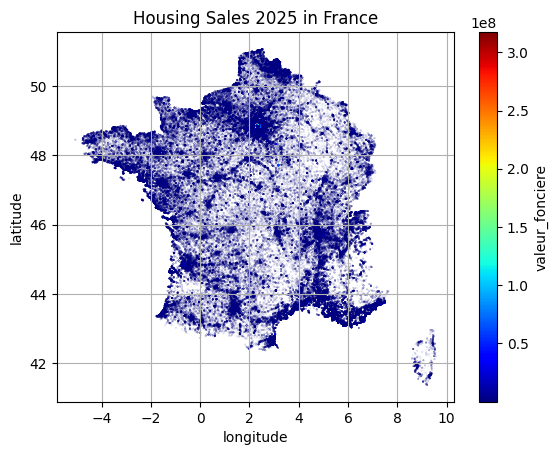

In [6]:
import matplotlib.pyplot as plt
df.plot(title="Housing Sales 2025 in France", kind="scatter", x="longitude", y="latitude", s=df["valeur_fonciere"]/100000000, c="valeur_fonciere", cmap="jet", legend=True, grid=True, sharex=False)
plt.show()

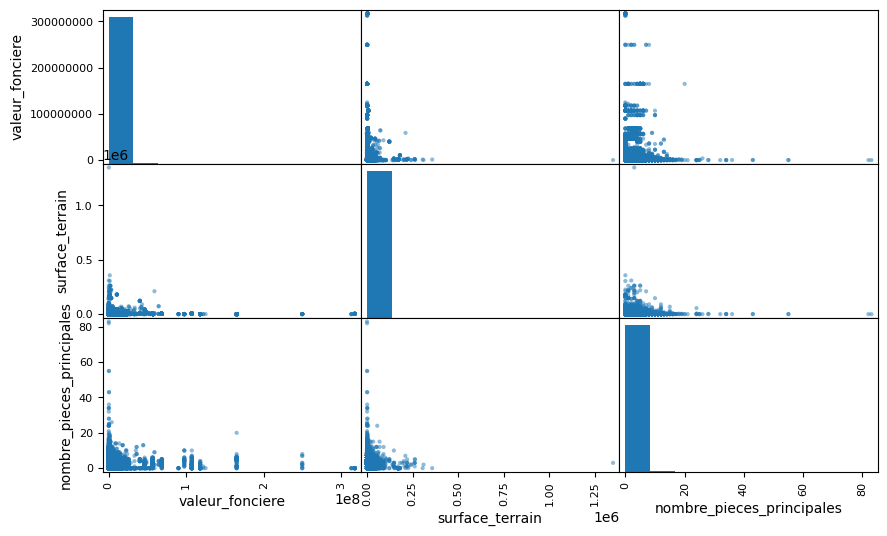

In [7]:
#any visual obvious correlation
from pandas.plotting import scatter_matrix
attributes = ["valeur_fonciere", "surface_terrain", "nombre_pieces_principales"]
scatter_matrix(df[attributes], figsize=(10, 6))
plt.show()

In [8]:
#analyse correlation for the price (valeur_fonciere) vs other features
corr_matrix=df.corr(numeric_only=True)
corr_matrix["valeur_fonciere"].sort_values(ascending=False)

valeur_fonciere              1.000000
code_type_local              0.119047
code_postal                  0.105304
surface_terrain              0.056564
latitude                     0.045526
surface_reelle_bati          0.026377
longitude                    0.011255
nombre_lots                 -0.004407
nombre_pieces_principales   -0.053262
Name: valeur_fonciere, dtype: float64

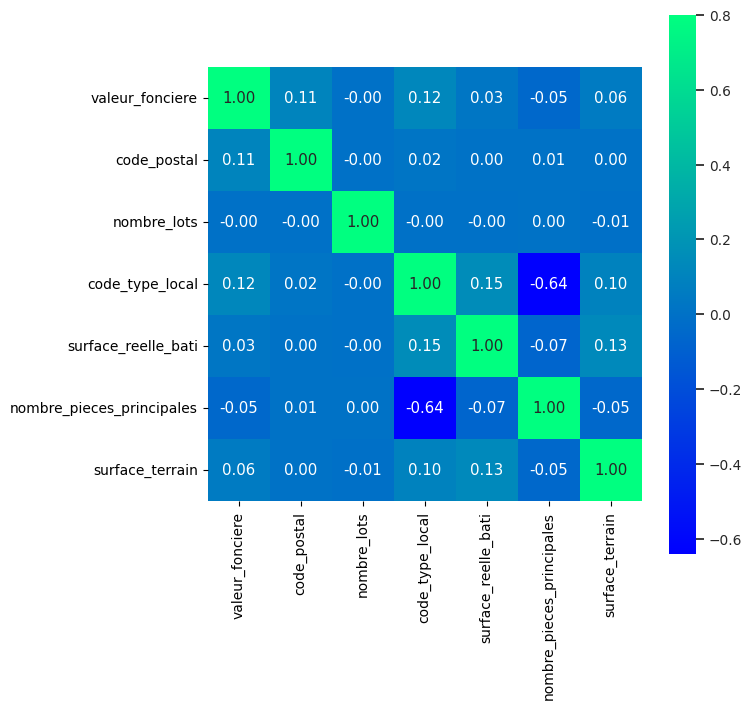

In [9]:
import seaborn as sns
df_corr=df.drop(['id_mutation', 'date_mutation', 'longitude', 'latitude'], axis=1)   # other common filter: df_corr.corr(numeric_only=True)
corr_matrix=df_corr.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(7,7))
sns.set_theme(font_scale=0.9)
sns.heatmap(corr_matrix, vmax=.8,square=True, annot=True, fmt=".2f", cmap = "winter")
plt.show()